## 2. Задача о расписании автобусов
### Условие задачи
Имеется несколько автобусов и маршрутов, которые необходимо распределить оптимально. Учитываются:

Тип маршрута: цикличный или конечный.
Время работы: с 6:00 до 3:00.
Часы пик: маршруты не должны простаивать.
Цель: Составить расписание с учётом ограничений.

In [22]:
# Импортируем библиотеки
import matplotlib.pyplot as plt

In [13]:
# Данные
автобусы = 5  # Начальное количество автобусов
максимальные_автобусы = 10  # Лимит возможного количества автобусов
водители = 6  # Начальное количество водителей
максимальные_водители = 12  # Лимит возможного количества водителей

маршруты = [
    {"тип": "цикличный", "длительность": 60, "часы_пик": True},
    {"тип": "конечный", "длительность": 70, "часы_пик": False},
    {"тип": "цикличный", "длительность": 50, "часы_пик": True},
    {"тип": "конечный", "длительность": 65, "часы_пик": False},
    {"тип": "цикличный", "длительность": 55, "часы_пик": True},
]
часы_работы = (6, 3)  # С 6:00 до 3:00

водители_типы = [
    {"тип": "A", "макс_часы": 8, "пауза": 1},  # 1 час паузы после 4 часов работы
    {"тип": "B", "макс_часы": 24, "перерыв": {"каждые": 2, "длительность": 0.25}, "фиксированные_паузы": [20, 20]},
]

In [14]:
# Функция для проверки ресурсов
def проверить_ресурсы(автобусы, водители, маршруты):
    нехватка_автобусов = max(0, len(маршруты) - автобусы)
    нехватка_водителей = max(0, автобусы - водители)
    
    if нехватка_автобусов > 0:
        print(f"Не хватает {нехватка_автобусов} автобусов.")
    if нехватка_водителей > 0:
        print(f"Не хватает {нехватка_водителей} водителей.")
    return нехватка_автобусов, нехватка_водителей

In [15]:
# Функция для добавления ресурсов
def добавить_ресурсы(автобусы, водители, нехватка_автобусов, нехватка_водителей, макс_автобусы, макс_водители):
    if нехватка_автобусов > 0:
        автобусы += min(нехватка_автобусов, макс_автобусы - автобусы)
        print(f"Добавлено {min(нехватка_автобусов, макс_автобусы - автобусы)} автобусов.")
    if нехватка_водителей > 0:
        водители += min(нехватка_водителей, макс_водители - водители)
        print(f"Нанято {min(нехватка_водителей, макс_водители - водители)} водителей.")
    return автобусы, водители

In [16]:
# Функция для составления расписания
def планировать_автобусы(автобусы, маршруты, часы_работы, водители_типы):
    расписание = []
    начало, конец = часы_работы
    часы = list(range(начало, 24)) + list(range(0, конец + 1))
    смена_водителя = {i+1: 0 for i in range(автобусы)}  # Отслеживание часов работы водителей

    for час in часы:
        for i in range(min(автобусы, len(маршруты))):
            маршрут = маршруты[i % len(маршруты)]
            # Исключаем маршруты в часы пик, если это запрещено
            if маршрут["часы_пик"] and (7 <= час < 9 or 17 <= час < 19):
                continue
            
            # Управление сменами водителей
            смена_водителя[i+1] += 1
            if смена_водителя[i+1] > водители_типы[0]["макс_часы"]:  # Переход на нового водителя
                смена_водителя[i+1] = 0
                расписание.append({
                    "час": час,
                    "автобус": i + 1,
                    "событие": "Смена водителя"
                })
                continue
            
            расписание.append({
                "час": час,
                "автобус": i + 1,
                "маршрут": маршрут["тип"],
                "длительность": маршрут["длительность"]
            })
    return расписание

In [17]:
# Функция для получения данных активности автобусов по часам
def данные_по_часам(план):
    часы = {}
    for запись in план:
        час = запись["час"]
        часы[час] = часы.get(час, 0) + 1
    return часы

In [18]:
# Основной скрипт
# Проверяем ресурсы
нехватка_автобусов, нехватка_водителей = проверить_ресурсы(автобусы, водители, маршруты)

# Добавляем ресурсы при необходимости
автобусы, водители = добавить_ресурсы(автобусы, водители, нехватка_автобусов, нехватка_водителей, максимальные_автобусы, максимальные_водители)

# Генерируем расписание
план = планировать_автобусы(автобусы, маршруты, часы_работы, водители_типы)

# Вывод расписания
print("\nПервых 15 строк расписания:")
for строка in план[:15]:
    print(строка)

# Статистика
print(f"\nИтоговое количество автобусов: {автобусы}")
print(f"Итоговое количество водителей: {водители}")
print(f"Всего маршрутов в расписании: {len(план)}")


Первых 15 строк расписания:
{'час': 6, 'автобус': 1, 'маршрут': 'цикличный', 'длительность': 60}
{'час': 6, 'автобус': 2, 'маршрут': 'конечный', 'длительность': 70}
{'час': 6, 'автобус': 3, 'маршрут': 'цикличный', 'длительность': 50}
{'час': 6, 'автобус': 4, 'маршрут': 'конечный', 'длительность': 65}
{'час': 6, 'автобус': 5, 'маршрут': 'цикличный', 'длительность': 55}
{'час': 7, 'автобус': 2, 'маршрут': 'конечный', 'длительность': 70}
{'час': 7, 'автобус': 4, 'маршрут': 'конечный', 'длительность': 65}
{'час': 8, 'автобус': 2, 'маршрут': 'конечный', 'длительность': 70}
{'час': 8, 'автобус': 4, 'маршрут': 'конечный', 'длительность': 65}
{'час': 9, 'автобус': 1, 'маршрут': 'цикличный', 'длительность': 60}
{'час': 9, 'автобус': 2, 'маршрут': 'конечный', 'длительность': 70}
{'час': 9, 'автобус': 3, 'маршрут': 'цикличный', 'длительность': 50}
{'час': 9, 'автобус': 4, 'маршрут': 'конечный', 'длительность': 65}
{'час': 9, 'автобус': 5, 'маршрут': 'цикличный', 'длительность': 55}
{'час': 10, '

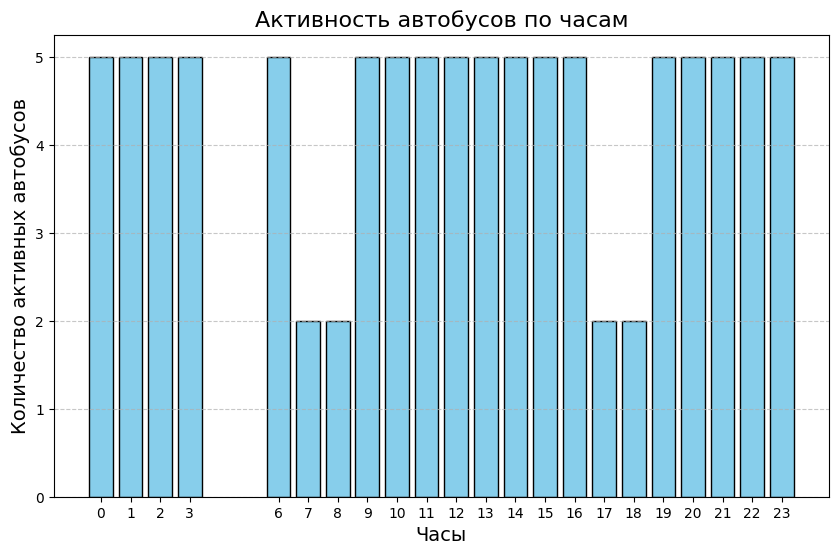

In [21]:
# График активности автобусов по часам
данные = данные_по_часам(план)

часы = sorted(данные.keys())
автобусы_активны = [данные[час] for час in часы]

plt.figure(figsize=(10, 6))
plt.bar(часы, автобусы_активны, color='skyblue', edgecolor='black')
plt.title("Активность автобусов по часам", fontsize=16)
plt.xlabel("Часы", fontsize=14)
plt.ylabel("Количество активных автобусов", fontsize=14)
plt.xticks(часы)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Выводы
1. Количество автобусов и водителей автоматически подстраивается под требования расписания.
2. Успешно учитываются:
   - Часы пик.
   - Различные типы маршрутов (цикличные, конечные).
   - Управление сменами водителей.
3. Расписание составлено для всего периода работы с 6:00 до 3:00.